In [1]:
import earthkit.data
import earthkit.plots

import matplotlib.pyplot as plt

In [2]:
data = earthkit.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/fc_msl_wg_joachim.grib")
data.ls()

fc_msl_wg_joachim.grib:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20111215,0,0,fc,0,regular_ll
1,ecmf,10fg6,surface,0,20111215,0,0,fc,0,regular_ll
2,ecmf,msl,surface,0,20111215,0,6,fc,0,regular_ll
3,ecmf,10fg6,surface,0,20111215,0,0-6,fc,0,regular_ll
4,ecmf,msl,surface,0,20111215,0,12,fc,0,regular_ll
5,ecmf,10fg6,surface,0,20111215,0,6-12,fc,0,regular_ll
6,ecmf,msl,surface,0,20111215,0,18,fc,0,regular_ll
7,ecmf,10fg6,surface,0,20111215,0,12-18,fc,0,regular_ll
8,ecmf,msl,surface,0,20111215,0,24,fc,0,regular_ll
9,ecmf,10fg6,surface,0,20111215,0,18-24,fc,0,regular_ll


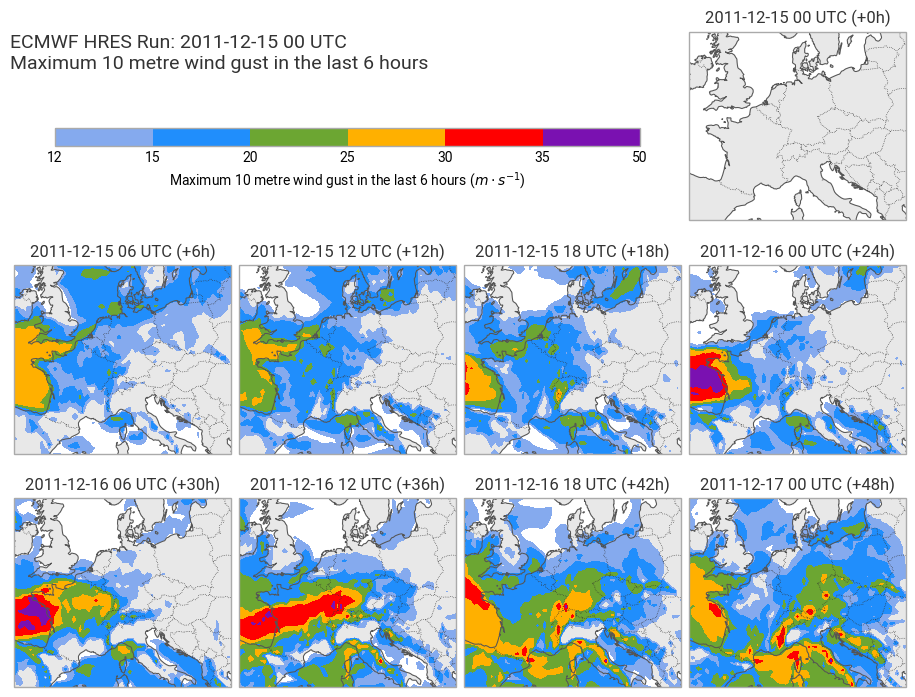

In [3]:
figure = earthkit.plots.Figure(domain=[-5, 23, 40, 58], size=(9, 7), rows=3, columns=4)

gust_style = earthkit.plots.styles.Style(
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
    levels=[12, 15, 20, 25, 30, 35, 50],
    units="m s-1",
)

figure.add_map(0, 3)
for i in range(8):
    figure.add_map(1+i//4, i%4)

figure.contourf(data.sel(shortName="10fg6"), style=gust_style)

figure.land()
figure.coastlines()
figure.borders()

ax = plt.axes((0.05, 0.8, 0.65, 0.025))
figure.legend(ax=ax)

figure.subplot_titles("{time:%Y-%m-%d %H} UTC (+{lead_time}h)")
figure.title(
    "ECMWF HRES Run: {base_time:%Y-%m-%d %H} UTC\n{variable_name}",
    fontsize=14, horizontalalignment="left", x=0, y=0.96,
)

figure.show()